In [101]:
import mujoco
import mujoco_viewer
import random
import os
import time
import numpy as np
import matplotlib.pyplot as plt

In [102]:

viewer = mujoco_viewer.MujocoViewer(model, data,"offscreen")
mujoco.mj_forward(model, data)
img = viewer.read_pixels(camid=0)




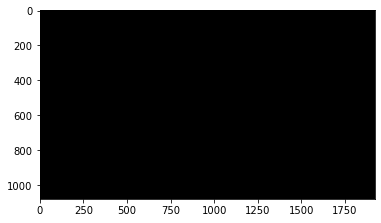

In [103]:
plt.imshow(img)

In [117]:
def step_input(model,data):
    mujoco.mj_resetData(model, data)

    
    data.actuator("a6_intvel").ctrl = 5.0
    result = {"qpos":[data.joint("joint_a6").qpos[0]], "qvel":[data.joint("joint_a6").qvel[0]], "ctrlvel":[data.ctrl[0]], "time":[data.time]}
    start = time.time()
    for _ in range(500):
        mujoco.mj_step(model,data)
        result["qpos"].append(data.qpos[0])
        result["qvel"].append(data.qvel[0])
        result["ctrlvel"].append(data.actuator("a6_intvel").ctrl[0])
        result["time"].append(data.time)
        if data.ctrl[0] and data.qpos[0] >= 5:
            data.actuator("a6_intvel").ctrl = 0.0


    end = time.time()
    print("time: ", end-start)
    return result


In [118]:
def set_kp(kp):
    xml_string=f"""<mujoco model="kuka_kr16_2">

    <asset>
        <mesh name="base_link" file="base_link.stl" />
        <mesh name="link_1" file="link_1.stl" />
        <mesh name="link_2" file="link_2.stl" />
        <mesh name="link_3" file="link_3.stl" />
        <mesh name="link_4" file="link_4.stl" />
        <mesh name="link_5" file="link_5.stl" />
        <mesh name="link_6" file="link_6.stl" />
        <mesh name="cestinho" file="cestinho.stl"  scale="0.001 0.001 0.001"/>
    </asset>


    <worldbody>
        <body name="base">
            <geom type="mesh" mesh="base_link" rgba="0.1 0.1 0.1 1" />
            <body name="link_1" pos="0 0 0.675" >
                <!-- <inertial pos="0 0 0" mass="0.000001" diaginertia="0.01 0.01 0.01" /> -->
                <!-- <joint name="joint_a1" pos="0 0 0" axis="0 0 1" limited="true" range="-3.22886 3.22886" /> -->
                <geom type="mesh" mesh="link_1" rgba="0.95 0.36 0.1 1"/>
                <body name="link_2" pos="0.26 0 0">
                    <!-- <inertial pos="0 0 0" mass="0.000001" diaginertia="0.01 0.01 0.01" /> -->
                    <!-- <joint name="joint_a2" pos="0 0 0" axis="0 1 0" limited="true" range="-2.70526 0.610865"  /> -->
                    <geom type="mesh" mesh="link_2" rgba="0.95 0.36 0.1 1"/>
                    <body name="link_3" pos="0.68 0 0">
                        <!-- <inertial pos="0 0 0" mass="0.000001" diaginertia="0.01 0.01 0.01" /> -->
                        <!-- <joint name="joint_a3" pos="0 0 0" axis="0 1 0" limited="true" range="-2.26893 2.68781" /> -->
                        <geom type="mesh" mesh="link_3" rgba="0.95 0.36 0.1 1"/>
                        <body name="link_4" pos="0.67 0 -0.035">
                            <!-- <inertial pos="0 0 0" mass="0.000001" diaginertia="0.01 0.01 0.01" /> -->
                            <!-- <joint name="joint_a4" pos="0 0 0" axis="-1 0 0" limited="true" range="-6.10865 6.10865"/> -->
                            <geom type="mesh" mesh="link_4" rgba="0.95 0.36 0.1 1" />
                            <body name="link_5" pos="0 0 0">
                                <!-- <inertial pos="0 0 0" mass="0.000001" diaginertia="0.01 0.01 0.01" /> -->
                                <!-- <joint name="joint_a5" pos="0 0 0" axis="0 1 0" limited="true" range="-2.26893 2.26893" /> -->
                                <geom type="mesh" mesh="link_5" rgba="0.95 0.36 0.1 1"/>
                                <body name="link_6" pos="0 0 0">
                                    <!-- <inertial pos="0 0 0" mass="0.000001" diaginertia="0.01 0.01 0.01" /> -->
                                    <joint name="joint_a6" pos="0 0 0" axis="-1 0 0" limited="true" range="-6.10865 6.10865"  />
                                    <geom type="mesh" mesh="link_6" rgba="0.95 0.36 0.1 1"/>
                                    <body name="cestinho" pos="0.155 0 0">
                                        <!-- <inertial pos="0 0 0" mass="0.000001" diaginertia="0.01 0.01 0.01" /> -->
                                        <geom type="mesh" mesh="cestinho" rgba="0.95 0.36 0.1 1" xyaxes="0 1 0 0 0 1"/>
                                    </body>
                                </body>
                            </body>
                        </body>
                    </body>
                </body>
            </body>
        </body>
    </worldbody>
    <actuator >
                <!-- <position name="a1_pos" joint="joint_a1" ctrllimited="true" ctrlrange="-3.22886 3.22886" gear="1" kp="1"/> -->
                <!-- <position name="a2_pos" joint="joint_a2" ctrllimited="true" ctrlrange="-2.70526 0.610865" gear="1" kp="1"/> -->
                <!-- <position name="a3_pos" joint="joint_a3" ctrllimited="true" ctrlrange="-2.26893 2.68781" gear="1" kp="1"/> -->
                <!-- <position name="a4_pos" joint="joint_a4" ctrllimited="true" ctrlrange="-6.10865 6.10865" gear="1" kp="1"/> -->
                <!-- <position name="a5_pos" joint="joint_a5" ctrllimited="true" ctrlrange="-2.26893 2.26893" gear="1" kp="1"/> -->
                <!-- <position name="a6_pos" joint="joint_a6" ctrllimited="true" ctrlrange="-6.10865 6.10865" gear="1" kp="2"/> -->

                <!-- <velocity name="a1_vel" joint="joint_a1" ctrllimited="true" ctrlrange="-2.72271363311 2.72271363311" gear="1" kv="1"/> -->
                <!-- <velocity name="a2_vel" joint="joint_a2" ctrllimited="true" ctrlrange="-2.72271363311 2.72271363311" gear="1" kv="1"/> -->
                <!-- <velocity name="a3_vel" joint="joint_a2" ctrllimited="true" ctrlrange="-2.72271363311 2.72271363311" gear="1" kv="1"/> -->
                <!-- <velocity name="a4_vel" joint="joint_a4" ctrllimited="true" ctrlrange="-5.75958653158 5.75958653158" gear="1" kv="1"/> -->
                <!-- <velocity name="a5_vel" joint="joint_a5" ctrllimited="true" ctrlrange="-5.75958653158 5.75958653158" gear="1" kv="1"/> -->
                <intvelocity name="a6_intvel" joint="joint_a6" ctrllimited="true" actrange="-6.10865 6.10865" ctrlrange="-10.7337748998 10.7337748998" kp="{kp}"/>



    </actuator>
    <contact>
        <exclude name="exclude_2_body_0" body1="base" body2="link_1"/>
        <exclude name="exclude_6_body_5" body1="link_5" body2="link_6"/>
       
</contact>
</mujoco>


"""
    with open("/home/luangb/Documents/TCC/Kuka_RL_Control/kr16_2.xml", "w") as f:
        f.write(xml_string)





In [119]:
def test_values(kp, kv):
    set_kp(kp)
    model = mujoco.MjModel.from_xml_path("/home/luangb/Documents/TCC/Kuka_RL_Control/environment.xml")
    data = mujoco.MjData(model)
    result = step_input(model,data)
    plt.plot(result["time"], result["qpos"], label="qpos")
    # plt.plot(result["time"], result["qvel"], label="qvel")
    # plt.plot(result["time"], result["ctrlpos"], label="ctrlpos")
    plt.plot(result["time"], result["ctrlvel"], label="ctrlvel")
    plt.grid()
    print("last_pos", result["qpos"][-1])
    plt.legend()
    plt.show()
    viewer = mujoco_viewer.MujocoViewer(model, data,"offscreen")
    mujoco.mj_forward(model, data)
    img = viewer.read_pixels(camid=0)
    plt.imshow(img)
    return result


    
    

time:  0.04964280128479004
last_pos 5.0008215666918225


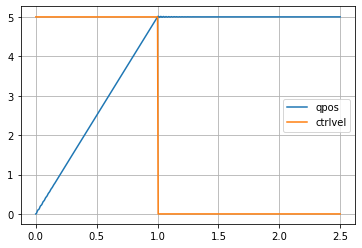

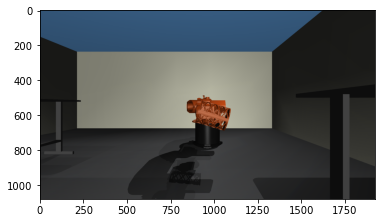

In [120]:
r=test_values(2000,0)

In [108]:
ss_pos = r["qpos"][400:-1]

In [70]:
(max(ss_pos)-min(ss_pos))/np.pi * 180

15.628135725609786

In [89]:
def test_best_kp():
    kp_list = np.linspace(0, 5000, 200)
    result = []
    for kp in kp_list:
        r = test_values(kp, 0)
        ss_pos = r["qpos"][400:-1]
        result.append((max(ss_pos)-min(ss_pos))/np.pi * 180)
        # print(kp, result[-1])
    plt.plot(kp_list, result)
    plt.grid()
    plt.show()
    return result

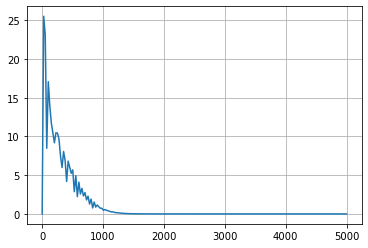

In [90]:
deviations=test_best_kp()

In [60]:
deviations = deviations[10:-1]
print(np.argmin(deviations), np.min(deviations))
np.linspace(0, 3500, 200)[10:-1][np.argmin(deviations)]

102 0.5264779337845001


1969.8492462311558

In [28]:
cam=model.cam("depth_camera0")

In [16]:
mujoco.mjv_makeScene(model, data, 0)

AttributeError: module 'mujoco' has no attribute 'mjv_makeScene'

In [17]:
ctx=mujoco.GLContext(1920, 1080)

In [18]:
ctx.make_current()

In [26]:
scn=mujoco.MjvScene(model,1000)

In [29]:
mujoco.update_scene(model, data, scn, cam)

AttributeError: module 'mujoco' has no attribute 'update_scene'

In [34]:
opt=mujoco.MjvOption()
mujoco.mjv_updateScene(model, data,opt,None,cam,1,scn)


TypeError: mjv_updateScene(): incompatible function arguments. The following argument types are supported:
    1. (m: mujoco._structs.MjModel, d: mujoco._structs.MjData, opt: mujoco._structs.MjvOption, pert: Optional[mujoco._structs.MjvPerturb], cam: mujoco._structs.MjvCamera, catmask: int, scn: mujoco._structs.MjvScene) -> None

Invoked with: <mujoco._structs.MjModel object at 0x7f49f2755770>, <mujoco._structs.MjData object at 0x7f49f256b970>, <MjvOption
  actuatorgroup: array([1, 1, 1, 0, 0, 0], dtype=uint8)
  flags: array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1], dtype=uint8)
  frame: 0
  geomgroup: array([1, 1, 1, 0, 0, 0], dtype=uint8)
  jointgroup: array([1, 1, 1, 0, 0, 0], dtype=uint8)
  label: 0
  sitegroup: array([1, 1, 1, 0, 0, 0], dtype=uint8)
  skingroup: array([1, 1, 1, 0, 0, 0], dtype=uint8)
  tendongroup: array([1, 1, 1, 0, 0, 0], dtype=uint8)
>, None, <_MjModelCameraViews
  bodyid: array([0], dtype=int32)
  fovy: array([58.])
  id: 0
  ipd: array([0.05])
  mat0: array([0., 0., 1., 1., 0., 0., 0., 1., 0.])
  mode: array([0], dtype=int32)
  name: 'depth_camera0'
  pos: array([3. , 0. , 0.7])
  pos0: array([3. , 0. , 0.7])
  poscom0: array([2.69367578, 0.01172623, 0.28206348])
  quat: array([0.5, 0.5, 0.5, 0.5])
  targetbodyid: array([-1], dtype=int32)
  user: array([], dtype=float64)
>, 1, <mujoco._structs.MjvScene object at 0x7f49f23b1670>